In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl

In [2]:
def arcmin_to_rp(theta,zeff, cosmo):
    chieff = ccl.comoving_radial_distance(cosmo,1./(1.+zeff)) #MPc 
    rads = theta * np.pi / 60. / 180.

    rp = rads * chieff

    return rp

In [3]:
theta, gam_mod = np.loadtxt('./txtfiles/photo_z_test/mod_IA_nfw_plus_lin.txt', unpack=True)

In [4]:
cosmo = ccl.CosmologyVanillaLCDM()

In [5]:
rp_of_theta = arcmin_to_rp(theta, 0.38,cosmo)

In [6]:
theta

array([  0.30541,   0.60341,   1.1918 ,   2.3571 ,   4.6615 ,   9.2158 ,
        18.198  ,  35.928  ,  70.893  , 139.8    ])

In [7]:
Sigma1h2h = np.loadtxt('./txtfiles/Sigma_1h2h_fix1halo_z[0]_fastPTxi.txt')

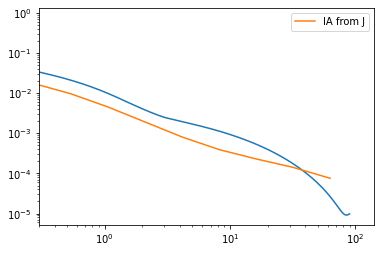

In [8]:
plt.figure()
plt.loglog(Sigma1h2h[:,0], Sigma1h2h[:,1]/10**15)
plt.loglog(rp_of_theta, -gam_mod, label='IA from J')
#plt.loglog(theta, DeltaSigma[:,10]/100, label='scale dep Delta Sig')
plt.xlim(0.3,140)
plt.legend()
plt.show()

In [9]:
barSigma1h2h = np.loadtxt('./txtfiles/barSigma_1h2h_fix1halo_z[0]_fastPTxi.txt')

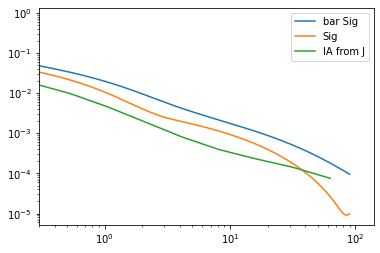

In [10]:
plt.figure()
plt.loglog(barSigma1h2h[:,0], barSigma1h2h[:,1]/10**15, label='bar Sig')
plt.loglog(Sigma1h2h[:,0], Sigma1h2h[:,1]/10**15, label='Sig')
plt.loglog(rp_of_theta, -gam_mod, label='IA from J')
#plt.loglog(theta, DeltaSigma[:,10]/100, label='scale dep Delta Sig')
plt.legend()
plt.xlim(0.3,140)
plt.show()

Delta_Sig_theory, zi= 0.300150963095


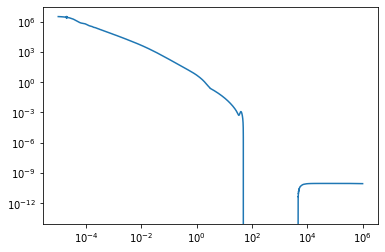

In [11]:
zL = np.loadtxt('./txtfiles/z_list_DESY1.txt')
DeltaSigma_centbins = np.zeros((len(theta), len(zL)))
for zi in [0]:
    print("Delta_Sig_theory, zi=", zL[zi])
    zload=str('{:1.12f}'.format(zL[zi]))
    # Import the appropriate correlation function
    r_hf, corr_hf_2h = np.loadtxt('./txtfiles/halofit_xi/xi2h_z='+zload+'_DESHoD.txt', unpack=True)
    r_hf, corr_1h = np.loadtxt('./txtfiles/xi_1h_terms/xi1h_ls_z='+zload+'_DESHoD.txt', unpack=True)
    for ri in range(0,len(r_hf)):
        if r_hf[ri]>3:
            corr_1h[ri] = 0.
    corr_hf = corr_hf_2h + corr_1h

plt.figure()
plt.loglog(r_hf, corr_hf)
#plt.xlim(0.1,100)
#plt.ylim(10**(-4),10**3)
plt.show()

In [12]:
DeltaSigmaz0 = np.loadtxt('./txtfiles/DeltaSigma_1h2h_z[0]_fix1halo_fastPTxi.txt')

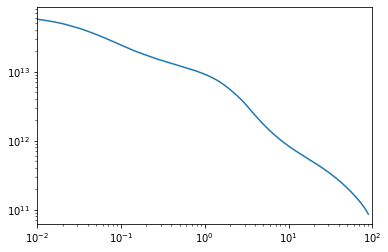

In [13]:
plt.figure()
plt.loglog(DeltaSigmaz0[:,0], DeltaSigmaz0[:,1])
plt.xlim(0.01,100)
plt.show()

In [ ]:
plt.figure()
plt.loglog(barSigma1h2h[:,0], barSigma1h2h[:,1]/10**15, label='bar Sig')
plt.loglog(Sigma1h2h[:,0], Sigma1h2h[:,1]/10**15, label='Sig')
plt.loglog(rp_of_theta, -gam_mod, label='IA from J')
plt.loglog(DeltaSigmaz0[:,0], DeltaSigmaz0[:,1]/10**15, label='DeltaSigma')
#plt.loglog(theta, DeltaSigma[:,10]/100, label='scale dep Delta Sig')
plt.legend()
plt.xlim(0.3,140)
plt.show()

In [ ]:
rp, Sigma = np.loadtxt('./txtfiles/Sigma_1h2h_z[0].txt', unpack=True)

In [ ]:
plt.figure()
plt.loglog(rp, Sigma/10**12)
plt.xlim(0.1,200)
#plt.ylim(0.1,200)
plt.show()

In [ ]:
# That has roughly the same shape as the correlation function so looks like the issue happens after this.

In [ ]:
rp, barSigma = np.loadtxt('./txtfiles/barSigma_1h2h_z[0].txt', unpack=True)

In [ ]:
plt.figure()
plt.loglog(rp, barSigma/10**12, label='bar Sigma')
plt.loglog(rp, Sigma/10**12, label='Sigma')
plt.legend()
plt.xlim(0.1,200)
#plt.ylim(0.1,200)
plt.show()

In [ ]:
plt.figure()
plt.loglog(rp, barSigma, label='bar Sigma')
plt.loglog(rp, Sigma/10**12, label='Sigma')
plt.legend()
plt.xlim(0.1,200)
#plt.ylim(0.1,200)
plt.show()

In [ ]:
rp, DeltaSigma = np.loadtxt('./txtfiles/DeltaSigma_1h2h_z[0]_fix1halo_rmin-6.txt', unpack=True)

In [ ]:
plt.figure()
plt.loglog(rp, DeltaSigma/10**12)
plt.xlim(0.1,100)
#plt.ylim(0.1,200)
plt.show()

In [ ]:
# Right so it's the subtraction that flattening the profile. What's going on here? 
# Do we expect this? I don't think we do.